In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv('google_books_dataset.csv')

print('Первые 5 строчек:')
print(df.head())
print
print('Последние 5 строчек:')
print(df.tail())

Первые 5 строчек:
        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers      

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15147 entries, 0 to 15146
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          15147 non-null  object 
 1   title            15139 non-null  object 
 2   subtitle         5983 non-null   object 
 3   authors          11622 non-null  object 
 4   publisher        7090 non-null   object 
 5   published_date   14933 non-null  object 
 6   description      8351 non-null   object 
 7   page_count       14933 non-null  float64
 8   categories       12695 non-null  object 
 9   average_rating   857 non-null    float64
 10  ratings_count    15147 non-null  int64  
 11  language         15147 non-null  object 
 12  preview_link     15147 non-null  object 
 13  info_link        15147 non-null  object 
 14  isbn_13          7383 non-null   float64
 15  isbn_10          7121 non-null   object 
 16  list_price       2943 non-null   float64
 17  currency    

In [ ]:
print(df.dtypes)

book_id             object
title               object
subtitle            object
authors             object
publisher           object
published_date      object
description         object
page_count         float64
categories          object
average_rating     float64
ratings_count        int64
language            object
preview_link        object
info_link           object
isbn_13            float64
isbn_10             object
list_price         float64
currency            object
buyable               bool
search_category     object
thumbnail           object
dtype: object


In [ ]:
print(df.isna().sum().sort_values(ascending=False))

average_rating     14290
list_price         12204
currency           12204
subtitle            9164
publisher           8057
isbn_10             8026
isbn_13             7764
description         6796
authors             3525
categories          2452
thumbnail            669
published_date       214
page_count           214
title                  8
book_id                0
ratings_count          0
language               0
preview_link           0
info_link              0
buyable                0
search_category        0
dtype: int64


In [ ]:
df['page_count'] = df['page_count'].fillna(df['page_count'].median())
df['average_rating'] = df['average_rating'].fillna(df['average_rating'].median())
df['list_price'] = df['list_price'].fillna(df['list_price'].median())

df['publisher'] = df['publisher'].fillna(df['publisher'].mode()[0])
df['categories'] = df['categories'].fillna(df['categories'].mode()[0])

df['subtitle'] = df['subtitle'].fillna('No subtitle')
df['description'] = df['description'].fillna('No description')

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15147 entries, 0 to 15146
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   book_id          15147 non-null  object        
 1   title            15139 non-null  object        
 2   subtitle         15147 non-null  object        
 3   authors          11622 non-null  object        
 4   publisher        15147 non-null  object        
 5   published_date   6054 non-null   datetime64[ns]
 6   description      15147 non-null  object        
 7   page_count       15147 non-null  float64       
 8   categories       15147 non-null  object        
 9   average_rating   15147 non-null  float64       
 10  ratings_count    15147 non-null  int64         
 11  language         15147 non-null  object        
 12  preview_link     15147 non-null  object        
 13  info_link        15147 non-null  object        
 14  isbn_13          7383 non-null   float

In [ ]:
print('Дубликаты:', df.duplicated().sum())

Дубликаты: 0


In [ ]:
df['page_z'] = zscore(df['page_count'])
outliers = df[np.abs(df['page_z']) > 3]

print('Количество выбросов:', outliers.shape[0])

Количество выбросов: 236


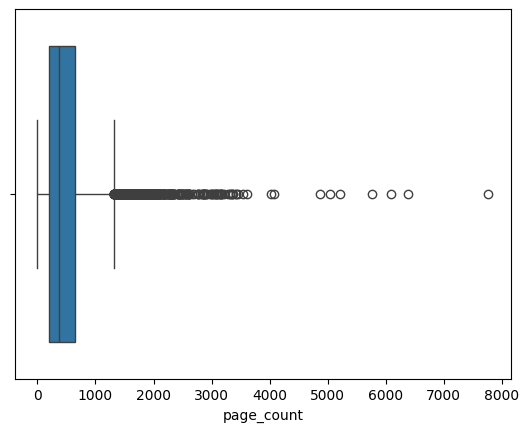

In [ ]:
sns.boxplot(x=df['page_count'])
plt.show()

In [ ]:
df.describe()

,published_date,page_count,average_rating,ratings_count,isbn_13,list_price,page_z
count,6054,15147.000000,15147.000000,15147.000000,7.383000e+03,15147.000000,1.514700e+04
mean,2016-01-12 04:32:49.474727424,483.143197,4.002608,0.379349,9.782399e+12,24.667135,7.505568e-18
min,1928-04-01 00:00:00,0.000000,1.000000,0.000000,9.780002e+12,0.000000,-1.109215e+00
25%,2012-07-13 18:00:00,208.000000,4.000000,0.000000,9.780763e+12,19.000000,-6.316821e-01
50%,2017-07-25 00:00:00,368.000000,4.000000,0.000000,9.781430e+12,19.000000,-2.643492e-01
75%,2021-06-16 12:00:00,652.000000,4.000000,0.000000,9.781787e+12,19.000000,3.876665e-01
max,2026-07-02 00:00:00,7768.000000,5.000000,826.000000,9.798999e+12,1755.000000,1.672479e+01
std,NaN,435.586665,0.263002,9.274538,3.730871e+09,37.699083,1.000033e+00


In [ ]:
df['language'].value_counts()
df['categories'].value_counts().head(10)

,count
categories,
Fiction,3446
Computers,737
Business & Economics,563
Education,371
History,365
Cooking,309
Medical,254
Science,252
Literary Criticism,250


In [ ]:
df[['page_count', 'average_rating', 'ratings_count', 'list_price']].corr()

,page_count,average_rating,ratings_count,list_price
page_count,1.000000,-0.005804,0.001515,0.108714
average_rating,-0.005804,1.000000,-0.026905,-0.003492
ratings_count,0.001515,-0.026905,1.000000,-0.010231
list_price,0.108714,-0.003492,-0.010231,1.000000


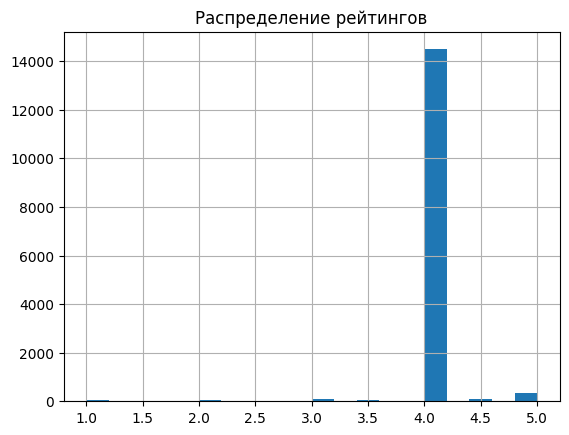

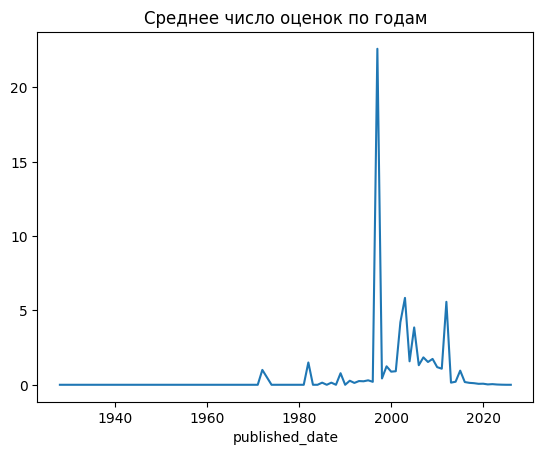

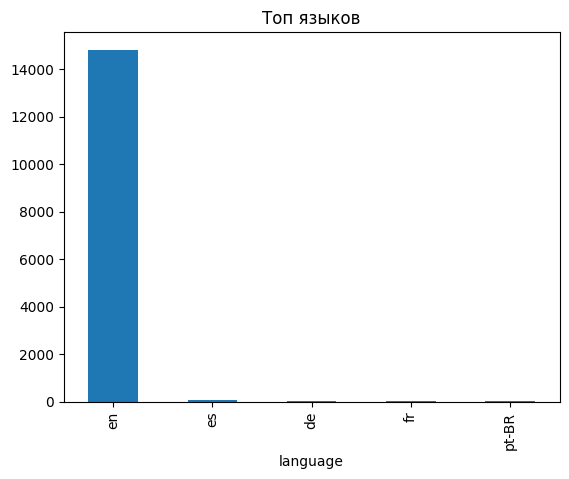

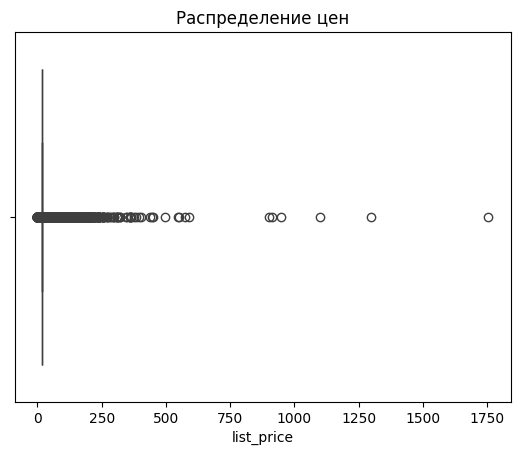

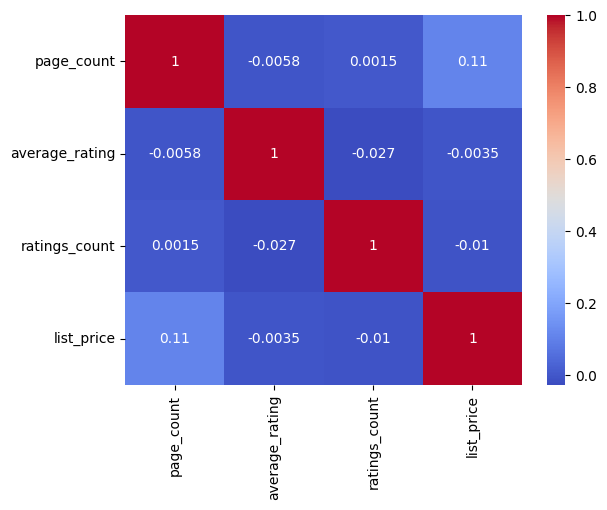

In [43]:
# 1. Гистограмма рейтингов
df['average_rating'].hist(bins=20)
plt.title('Распределение рейтингов')
plt.show()

# 2. Линейный график (по времени)
df.groupby(df['published_date'].dt.year)['ratings_count'].mean().plot()
plt.title('Среднее число оценок по годам')
plt.show()

# 3. Столбчатая диаграмма языков
df['language'].value_counts().head(5).plot(kind='bar')
plt.title('Топ языков')
plt.show()

# 4. Boxplot цен
sns.boxplot(x=df['list_price'])
plt.title('Распределение цен')
plt.show()

# 5. Heatmap корреляций
sns.heatmap(
    df[['page_count', 'average_rating', 'ratings_count', 'list_price']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.show()

In [ ]:
#средний рейтинг по категориям
df.groupby('language')['average_rating'].mean()

,average_rating
language,
ar,4.000000
bs,4.000000
ca,4.000000
cs,3.833333
da,4.000000
de,3.952381
el,4.000000
en,4.002564
es,4.057971


In [ ]:
#количество книг по категориям
df.groupby('categories').size().sort_values(ascending=False).head(10)

,0
categories,
Fiction,3446
Computers,737
Business & Economics,563
Education,371
History,365
Cooking,309
Medical,254
Science,252
Literary Criticism,250


In [ ]:
#количество оценок по языкам
df.groupby('language')['ratings_count'].sum()

,ratings_count
language,
ar,0
bs,0
ca,0
cs,1
da,0
de,24
el,0
en,5658
es,45


In [ ]:
pd.pivot_table(df, values='average_rating', index='language', aggfunc='mean')

,average_rating
language,
ar,4.000000
bs,4.000000
ca,4.000000
cs,3.833333
da,4.000000
de,3.952381
el,4.000000
en,4.002564
es,4.057971


In [ ]:
#создание файла с обработанным датасетом
df.to_csv('books_cleaned.csv', index=False)